# C’est quoi un arbre de décision ?

L’arbre de décision est un algorithme de machine Learning. Cet algorithme fait partie de la catégorie des algorithmes supervisés et il permet de prédire une valeur (prédiction) ou une catégorie (classement). Comme son nom l’indique, cet algorithme se base sur la construction d’un arbre ce qui rend la méthode simple à expliquer et facile à interpréter. Pour bien explique l’algorithme, je vais prendre comme exemple la base de données Titanic que j’utilise pour mon travail de session. On cherche à prédire la survie des passagers.

In [2]:
import os 
from sklearn import tree
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from os import system
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
# On importe les données
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


On voit que le database detient 891 passagers. L'algorithme d'arbre de decision cherche a séparer les passagers en 2 populations selon les variables qu'on va lui donner ( l'age, le sexe, la classe etc). Pour faire son choix l’algorithme va tester chaque variable et utilisera une métrique pour faire son choix. L'algorithme d'arbre de decisions peut utiliser 2 metriques:
* criterion
* gini

Dans notre cas, on utilise la metrique gini pour le decoupage.
Je ne vais pas expliquer ici le code car je le fait dans mon travail final et je ne decoupe pas les données en 2 parties car le but ici est de visualiser l'arbre sans tester la qualité de notre algorithme. 

In [4]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Fare'],axis='columns',inplace=True)
data.Sex = data.Sex.map({'male': 1, 'female': 2})
data.Age = data.Age.fillna(data.Age.mean())

In [5]:
# criterion='gini'
# criterion='entropy'

Q1 = data.drop('Survived',axis='columns')
y = data.Survived
modelTree = tree.DecisionTreeClassifier(random_state=0, criterion='entropy',max_depth=3 )
modelTree.fit(Q1,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

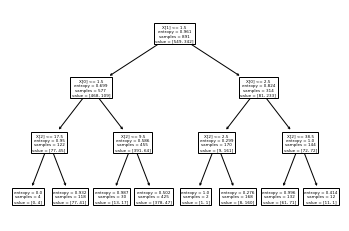

In [6]:
tree.plot_tree(modelTree);

In [52]:
dotfile = open("test.dot", 'w')
tree.export_graphviz(modelTree, out_file=dotfile, 
                      feature_names=['Pclass','Genre','Age'],  
                      class_names =['Mort','Vivant'],
                      filled=True, rounded=True,  
                      special_characters=True)  

dotfile.close()
system("dot -Tpng test.dot -o dtree2.png")

0

Dans notre exemple c’est la variable « Sex » qui obtient la meilleure entropie lors de cette 1ere étape. L’arbre de décision sépare donc les hommes et les femmes. Au global, les chances de survie sont de 38% (100 x 342/891). En séparant les hommes et les femmes on voit que les femmes ont une chance de survie de 81.1% (100 x 468/577) tandis que les hommes ont seulement 25.7% (100 x 81/314) de chance de s’en sortir. L’algorithme va continuer sa phase d’apprentissage en reprenant chaque feuille et en cherchant la variable qui permet de séparer au mieux les 2 classes. Un des inconvénients de cette méthode c’est le risque de sur-apprentissage. On peut laisser l’algorithme se déployer au maximum pour coller parfaitement au dataset d’entrainement. Dans ce cas là, la performance de l’algorithme sur les données qui ont permis de le créer sera excellente. En revanche il se généralisera très mal sur de nouvelles données. Pour éviter cela il est nécessaire d’avoir un arbre par trop grand. C’est là que l’élagage intervient. Cette méthode consiste simplement à supprimer des branches et des feuilles de l’arbre.Les feuilles ne seront presque jamais pures à 100% mais nous avons besoin qu’un choix soit fait pour chaque feuille. Pour une problématique de classement, c’est assez simple, l’algorithme affecte à chaque feuille la classe la plus représentée.

Dans cet exemple notre metrique est criterion='entropy'

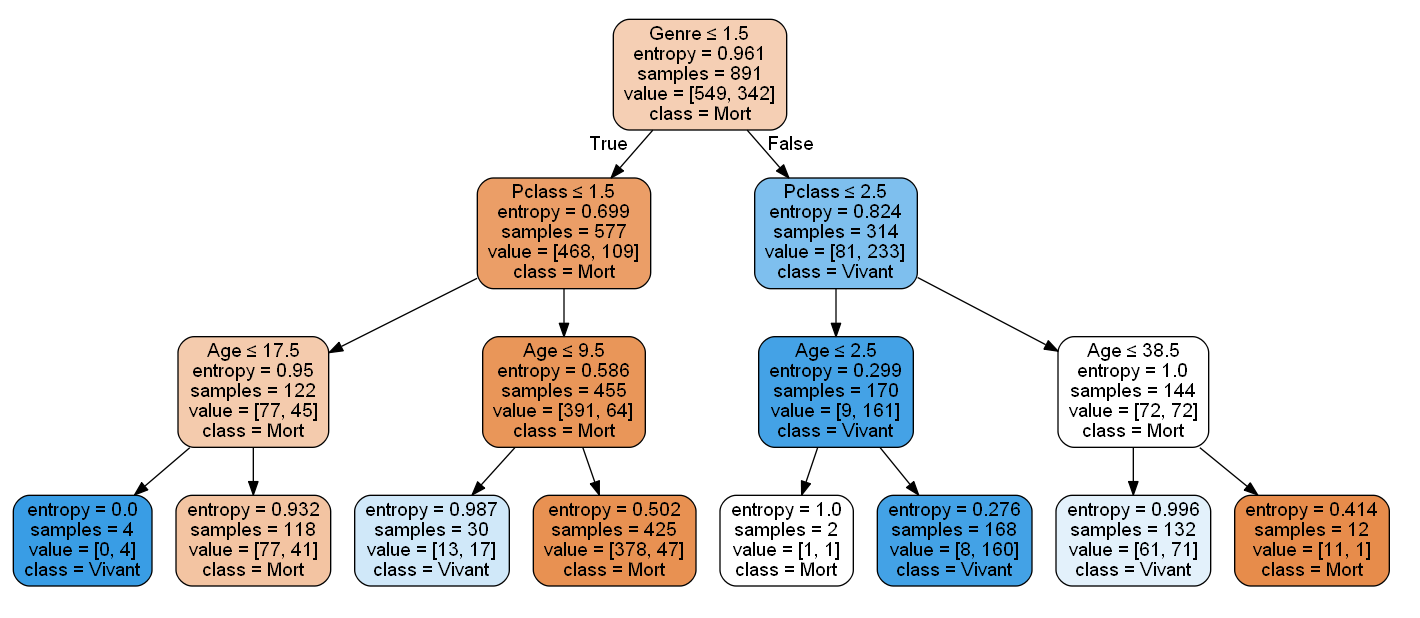

Le meme exemple mais cette fois avec la metrique gini
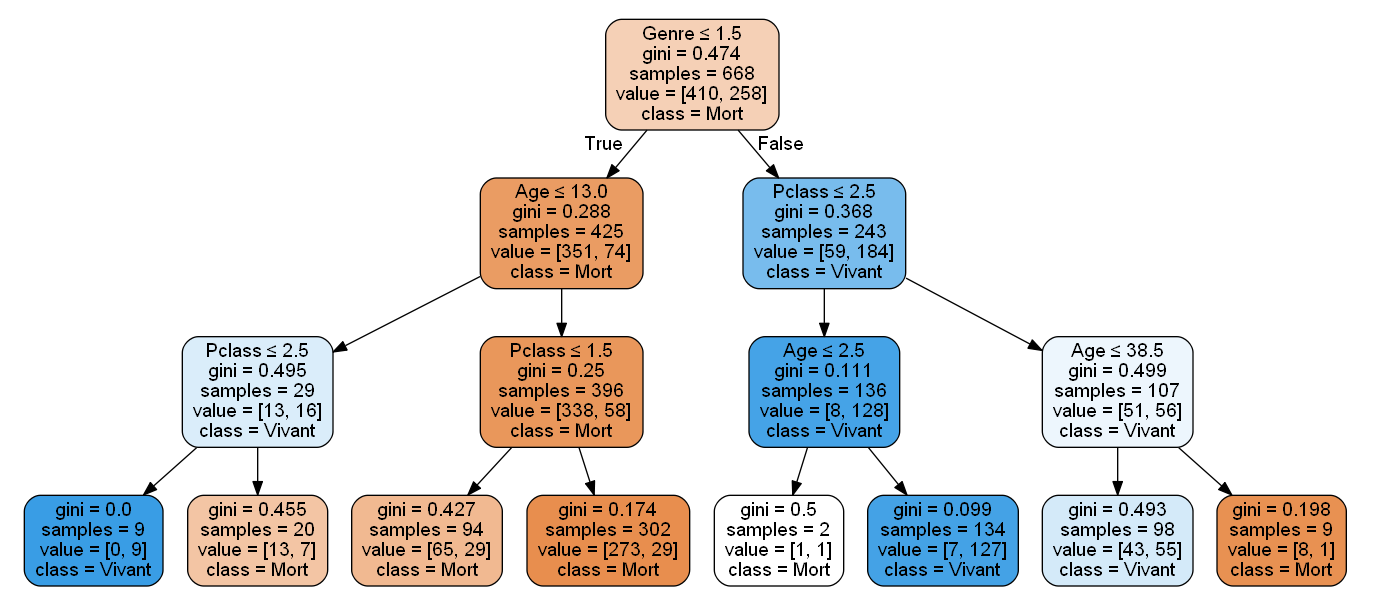

# C’est quoi une forêt aléatoire ?

On avait discuté deja de l'arbre décisionnel, un algorithme d’entraînement qui cherche à maximiser le score gini ou entropy à chaque division de l'arbre. Cependant, le résultat obtenu avec un arbre décisionnel n'est pas optimal. Or, rien ne dit que l'on n’aurait pas pu obtenir un bien meilleur arbre si nous n'avions pas varié l'ordre de la prise des décisions car rien ne prouve que l'ordre dans lesquelles les décisions ont été prises est le meilleur parmi tous les ordres qu'il est possible de choisir. La forêt aléatoire peut résoudre cet inconvénient. En effet, la forêt aléatoire est composée de plusieurs arbres de décision. Avec cet algorithme, on construit plusieurs arbres de décision et on les entraine, pour finir par prendre la décision que tous ou du moins que la majorité considérera comme la meilleure. L’idée derrière la forêt aléatoire est qu'en entraînant plusieurs arbres de décision plutôt qu'un seul, ayant tous une expérience différente, la décision sera meilleure pour résoudre un problème que si ce n'était qu'un seul arbre de décision qui avait été entraîné. Donc, on peut affirmer que plus on augmente le nombre d'arbres présents dans forêt aléatoire, plus il y a de chance que cette dernière converge vers la solution optimale du problème que l'on cherche à résoudre. L'algorithme d'entraînement de la forêt aléatoire construit plusieurs arbres de décisions et les entraîne avec un sous-ensemble des données du problème. Il choisit aléatoirement des données auxquelles une partie des arbres de décisions n'auront pas accès tandis qu'une autre y aura accès afin de les rendre totalement aveugles à ces dernières et de s'assurer que tous les arbres de décision aient bien une expérience différente du problème. Une fois l'entraînement de tous les arbres de décision terminés, la forêt aléatoire prend ses décisions relativement au problème de classification ou de régression à résoudre, en faisant voter tous les arbres de décisions qui le compose. Évidemment, la décision de la majorité l'emporte. Je vais donner un exemple dans mon travail de session qui va expliquer le principe.   

In [7]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(Q1,y)

RandomForestClassifier(n_estimators=20)

In [8]:
random_forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=358261983),
 DecisionTreeClassifier(max_features='auto', random_state=170998442),
 DecisionTreeClassifier(max_features='auto', random_state=1194029907),
 DecisionTreeClassifier(max_features='auto', random_state=1907394386),
 DecisionTreeClassifier(max_features='auto', random_state=735124420),
 DecisionTreeClassifier(max_features='auto', random_state=953911185),
 DecisionTreeClassifier(max_features='auto', random_state=1561667965),
 DecisionTreeClassifier(max_features='auto', random_state=18928577),
 DecisionTreeClassifier(max_features='auto', random_state=1263143576),
 DecisionTreeClassifier(max_features='auto', random_state=905213602),
 DecisionTreeClassifier(max_features='auto', random_state=1840389192),
 DecisionTreeClassifier(max_features='auto', random_state=607405119),
 DecisionTreeClassifier(max_features='auto', random_state=788395434),
 DecisionTreeClassifier(max_features='auto', random_state=1111823271),
 DecisionTreeCl

In [55]:
len(random_forest.estimators_)

20

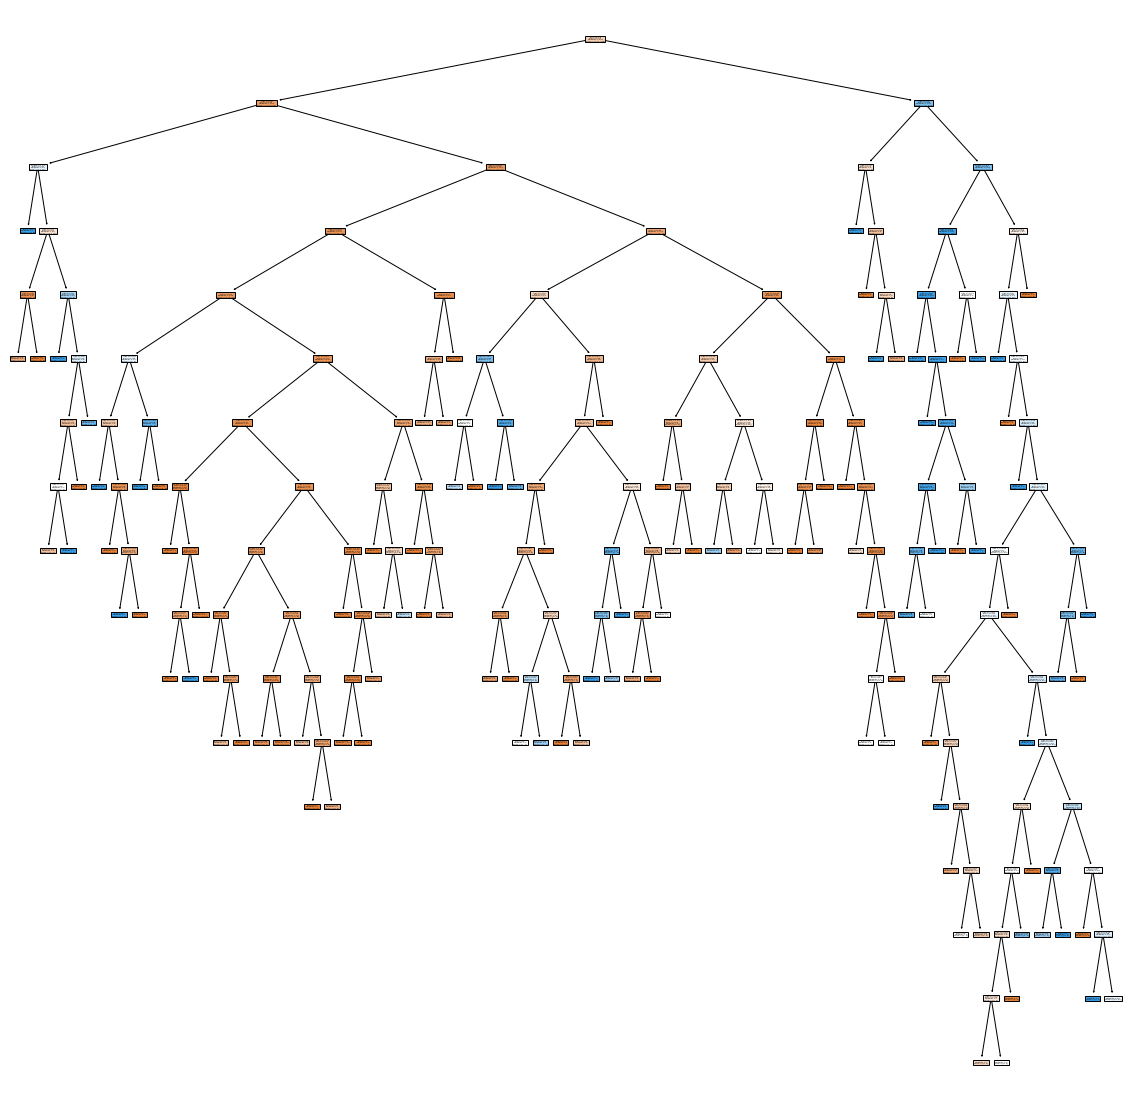

In [56]:
# L'arbre est trop grand pour le visualiser en une seule figure et le rendre lisible.

plt.figure(figsize=(20,20))
_ = tree.plot_tree(random_forest.estimators_[0], feature_names=Q1.columns, filled=True)

In [11]:
# Vérifions la profondeur du premier arbre de la forêt aléatoire
random_forest.estimators_[0].tree_.max_depth

14

Notre premier arbre a max_depth=14. D'autres arbres ont une profondeur similaire. Pour rendre la visualisation lisible il sera bon de limiter la profondeur de l'arbre.

In [39]:
# On va mettre une limite de 3

random_forest = RandomForestClassifier(n_estimators=5, max_depth=3)
random_forest.fit(Q1,y)

RandomForestClassifier(max_depth=3, n_estimators=5)

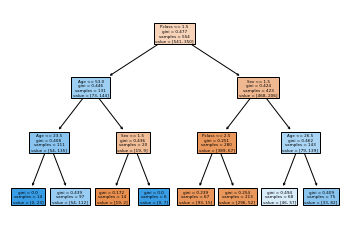

In [40]:
# Le premier estimateur
_ = tree.plot_tree(random_forest.estimators_[0], feature_names=Q1.columns, filled=True)

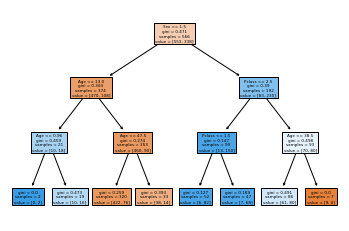

In [41]:
# le 2 estimateur
_ = tree.plot_tree(random_forest.estimators_[1], feature_names=Q1.columns, filled=True)

# C’est quoi une classification bayésienne naïve ?

La classification bayésienne naïve se base sur le théorème de Bayes. Cet algorithme est utilisé pour les problématiques de classement avec des variables explicatives qualitatives. Ce théorème est fondé sur les probabilités conditionnelles : Quelle est la probabilité qu’un événement se produise sachant qu’un autre événement s’est déjà produit.

Prenons un exemple : 
Supposons qu’on ait une classe au cegep.

Soit A et B les deux événements suivants :
* L’événement A : l’élève est une fille.
* L’événement B : l’élève pratique l’allemand.

Quelle est la probabilité qu’on choisisse au hasard une fille pratiquant l’allemand ?

Le théorème de Bayes permet de calculer ce genre de probabilité.

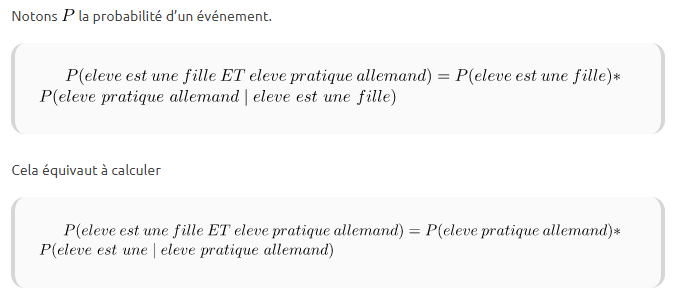

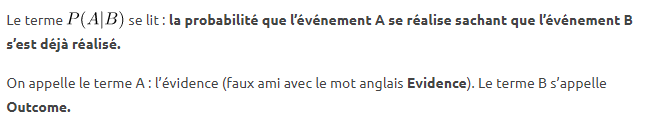

Reprenons l’exemple des eleves pratiquant l’allemand. Imaginons le jeu de données suivant :
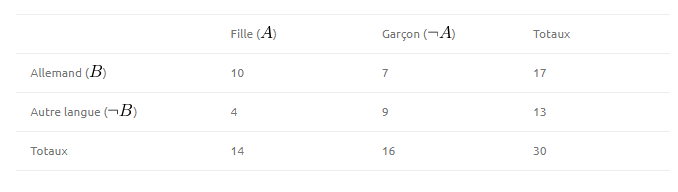

**Calculons la probabilité suivante : Quelle est la probabilité qu’on tire au hasard un élève parlant Allemand sachant qu’elle est une fille ?**

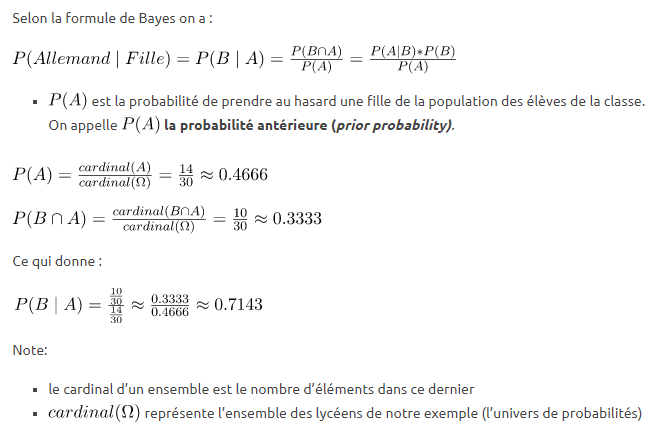

Donc, la probabilité qu’on tire au hasard un élève parlant Allemand sachant qu’elle est une fille est de 71,4%

Lors de l’exemple précédent, nous avons appliqué le théorème de Bayes avec une seule variable prédictive (Evidence) : A savoir le sexe de l’élève. Dans les vraies applications du Naive Bayes, on calcule le résultat (Outcome) en se basant sur plusieurs variables. 

La bibliothèque Scikit-learn de Python destinée à l’apprentissage automatique fourni le module sklearn.naîve_bayes qui contient plusieurs classificateurs Bayes Naïfs, dont chacun performe mieux sur un certain type de donnée.

Les types de classificateurs que la bibliothèque contient sont les suivants :

* Gaussian Naîve Bayes ;
* Multinomial Naîve Bayes ;
* Complement Naîve Bayes ;
* Bernoulli Naîve Bayes ;
* Categorical Naîve Bayes.

# C’est quoi le bagging ?

Le bagging est une technique utilisée pour améliorer la classification notamment celle des arbres de décision, considérés comme des « classifieurs faibles », c’est-à-dire à peine plus efficaces qu’une classification aléatoire.

En général, le bagging a pour but de réduire la variance de l’estimateur, en d’autres termes de corriger l’instabilité des arbres de décision (le fait que de petites modifications dans l’ensemble d’apprentissage entraînent des arbres très différents). Pour ce faire,  le principe du bootstrap est de créer de « nouveaux échantillons » par tirage au hasard dans l’ancien échantillon, avec remise. L’algorithme, par exemple l’arbre de décision, est entraîné sur ces sous-ensembles de données. Les estimateurs ainsi obtenus sont moyennés (lorsque les données sont quantitatives, cas d’un arbre de régression) ou utilisés pour un « vote » à la majorité (pour des données qualitatives, cas d’un arbre de classification).  C’est la combinaison de ces multiples estimateurs « indépendants » qui permet de réduire la variance. Toutefois, chaque estimateur est entrainé avec moins de données. En pratique, la méthode de bagging donne d’excellents résultats (notamment sur les arbres de décision utilisés en « forêts aléatoires »).

L’idée derrière cet algorithme est que plusieurs petits algorithmes peuvent être plus performants qu’un seul grand algorithme.
Pour simplifier, on peut se représenter mentalement ce procédé par une grande forêt de petits arbustes, d’espèces différentes. Grâce à la variété des arbres qui compose la forêt, elle résistera mieux aux intempéries qu’un grand chêne centenaire.

# C’est quoi Adaboost ?

Pour bien expliquer c'est quoi Adaboost, il faut comprendre ce que font les algorithmes de Boosting . Le terme « Boosting » fait référence à une famille d'algorithmes qui convertit un modèle de faible précision (appelé apprenant faible ou classificateur faible) en modèles de haute précision ( apprenant fort ).Le boosting est une méthode d'ensemble pour améliorer les prédictions du modèle d'un algorithme d'apprentissage donné. L'idée derrière cela est de former des apprenants faibles de manière séquentielle , chacun essayant de corriger son prédécesseur.

Cela se fait en créant d'abord un modèle à partir des données d'apprentissage, puis un deuxième modèle est créé qui tente de corriger les erreurs du premier modèle.

Les modèles sont ajoutés jusqu'à ce que l'ensemble d'apprentissage soit parfaitement prédit ou qu'un nombre maximal de modèles soit ajouté.




AdaBoost est une technique d'amplification populaire qui nous aide à combiner plusieurs "classificateurs faibles" en un seul "classificateur fort".Pour être clair, un classificateur faible est simplement un classificateur qui fonctionne mal, mais fonctionne mieux qu'une supposition aléatoire.Un exemple simple d'un classificateur faible serait de classer une personne en tant que classe "homme" ou "femme" en fonction de sa taille. On pourrait dire que toute personne de plus de 185 cm est un garçon et toute personne en dessous de cette taille est une fille. Cela classera de nombreuses personnes de manière incorrecte, mais notre précision sera toujours supérieure à 50%.En rassemblant de nombreux modèles de ce type, AdaBoost parvient à générer un modèle globalement meilleur que les seuls classificateurs faibles pris individuellement.En tant que classificateur faible à entraîner, Adaboost utilise autant d'arbres de décision à un niveau de profondeur , appelés souches de décision , que de caractéristiques du modèle.A chaque itération, un nouveau classificateur faible est introduit en séquence et vise à pallier les « lacunes » des modèles précédents pour créer un classificateur fort. L'objectif global de cet exercice est d'adapter consécutivement de nouveaux modèles pour fournir des estimations plus précises de notre variable de réponse.

En réalité, AdaBoost n'accepte pas seulement les arbres de décision comme des apprenants faibles : tout algorithme d'apprentissage automatique peut être utilisé comme classificateur de base s'il accepte des poids sur l'ensemble d'apprentissage.

# C’est quoi la normalisation des données ?

Les méthodes de normalisation des données sont utilisées pour que les variables, mesurées à différentes échelles, aient des valeurs comparables. Cette étape de prétraitement est importante pour le regroupement et la visualisation des heatmap, l’analyse en composantes principales et d’autres algorithmes d’apprentissage machine basés sur des mesures de distance.

La normalisation standard, également appelée standardisation ou normalisation z-score, consiste à soustraire la moyenne et à la diviser par l’écart type. Dans ce cas, chaque valeur refléterait la distance par rapport à la moyenne en unités d’écart-type.

Si nous supposons que toutes les variables proviennent d’une distribution normale, la normalisation z-score les rapprocherait toutes de la distribution normale standard. La distribution résultante a une moyenne de 0 et un écart-type de 1.

# C’est quoi la courbe AUC (ROC) ?

En statistique, les caractéristiques de fonctionnement du récepteur (ROC) sont une représentation graphique de l'efficacité du modèle prédictif en traçant les caractéristiques qualitatives des classificateurs binaires dérivés du modèle en utilisant de nombreux points de coupure différents.

La courbe est créée en traçant le taux de vrais positifs (TPR) par rapport au taux de faux positifs (FPR) à divers réglages de seuil.

En d'autres termes, chaque point de la courbe ROC correspond à une matrice de confusion différente obtenue en modifiant ce que l'on appelle le «point de coupure». Plus nous explorons de points de coupure différents, plus nous obtenons de points sur la courbe ROC.



Le point avec les coordonnées (0,0) signifie que le classificateur n'a pas fait une seule classification correcte, mais en même temps n'a pas fait d'erreur. Le contraire de cette situation est le point avec les coordonnées (1,1). Le point (0,1) représente le cas d'une classification parfaite.

La ligne diagonale y = x ou TPR = FPR représente un classificateur aléatoire.

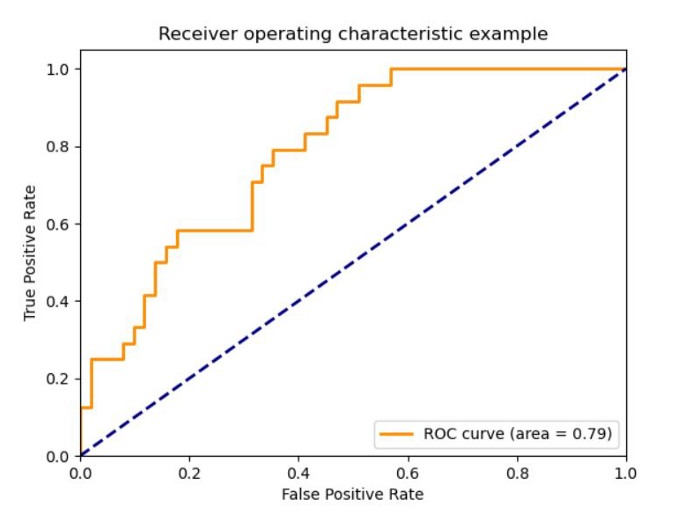

La courbe ROC est souvent utilisée comme un outil pour évaluer et comparer les modèles de classification. Une approche très populaire consiste à calculer l'aire sous la courbe ROC, notée AUC (aire sous la courbe), et à la traiter comme une mesure de la qualité et de la précision d'un modèle donné.

La valeur de l'AUC varie de 0 à 1. Plus la valeur est élevée, meilleur est le modèle. L'AUC a une propriété statistique significative, c'est-à-dire qu'elle équivaut à la probabilité que le classificateur donne un poids plus élevé à une instance positive sélectionnée au hasard qu'à une instance négative sélectionnée au hasard 
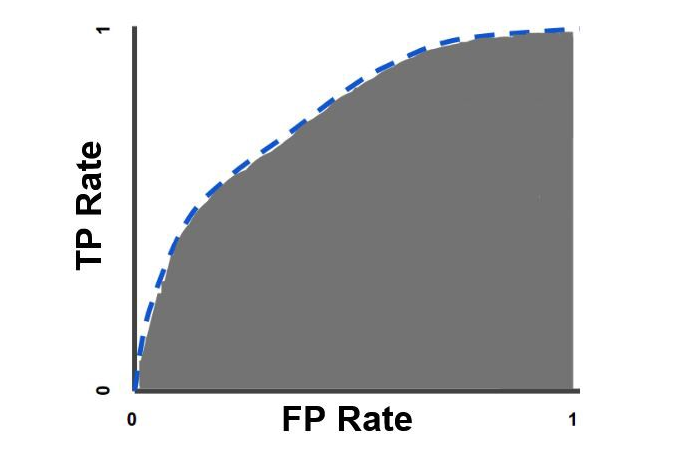

La valeur de l'AUC varie de 0 à 1. Plus la valeur est élevée, meilleur est le modèle. L'AUC a une propriété statistique significative, c'est-à-dire qu'elle équivaut à la probabilité que le classificateur donne un poids plus élevé à une instance positive sélectionnée au hasard qu'à une instance négative sélectionnée au hasard

L'AUC est calculée comme suit:
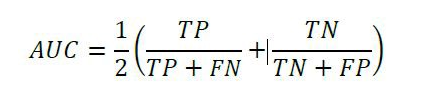

* AUC = 100% pour un modèle parfait,
* AUC = 50% pour le modèle aléatoire,
* AUC = 0% pour un modèle médiocre.

# Expliquez les métriques suivantes :

Avant d'expliquer les 2 definitions, il faut comprendre c'est quoi une matrice de confusion.
* Une matrice de confusion, aussi appelée matrice d'erreur, est un tableau de 4 cases comportant 4 valeurs essentielles pour évaluer statistiquement un résultat. Généralement, issu d'une classification et/ou d'un algorithme d'intelligence artificelle.

Les 4 valeurs sont :
- le nombre de vrais positifs (VP ou TP)
- le nombre de faux positifs (FP)
- le nombre de vrai négatifs (VN ou TN)
- le nombre de faux négatifs (FN)


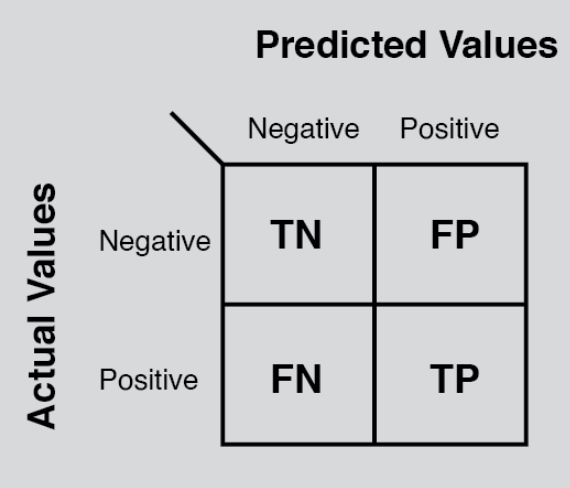

* Taux de vrais positifs fpr :est le taux auquel le classificateur prédit un résultat « positif » pour les observations qui sont en fait « négatives »
* Taux de faux négatifs tpr :est le taux auquel le classificateur prédit un résultat « positif » pour des observations qui sont « positives ».


Pour comprendre mieux, je vais donner une expliquation avec plus de details:

* Le TPR (True Positive Rate, également connu sous le nom de Recall) et le FPR (False Positive Rate, probabilité d'une fausse alarme) sont des métriques liées aux performances prédictives d'un modèle de classification. La courbe ROC est construite sur ces métriques, tout en faisant varier le seuil de classification du classificateur.

Prenons comme exemple une base de données avec 100 patients.Nous voulons prédire si un patient a le cancer ou non.Les 100 patients sont évalués à l'aide du modèle : 10 d'entre eux ont effectivement un cancer.Alors, quels seraient le TPR et le FPR pour notre modèle? Dissons que tous les patients sont en santé et n'ont pas le cancer (toutes les prédictions sont négatives). Donc, notre modèle atteindrait une précision de 90 % et 10 personnes atteintes de cancer auraient reçu une prédiction faussement négative.

Alors, TPR = (nombre de patients atteints de cancer qui ont été prédits comme positifs) / (total de patients atteints de cancer)
Sur le total de patients atteints de cancer (10 patients), notre modèle factice n'en prédirait aucun correctement, donc notre TPR serait égal à 0 %. Ce qui est terrible.

FPR = (nombre de patients qui n'ont pas de cancer et qui ont été prédits positifs) / (nombre total de patients sans cancer)
Sur le total des patients qui n'ont pas de cancer, nous n'avons prédit aucun d'entre eux comme positif, nous atteindre un taux de faux positifs de 0%, ce qui est excellent. Mais attendez, notre TPR est également de 0%, donc notre modèle est aussi bon qu'un estimateur aléatoire.

Un modèle parfait serait celui où notre TPR est de 100 %, nous classons donc tous les patients atteints de cancer comme ayant un cancer, et un FPR de 0 %, de sorte que nous ne donnons aucune fausse alerte.




# Expliquez les métriques suivantes :
* **F-measure**
    * Est une mesure de la précision d'un modèle sur un ensemble de données. Il est utilisé pour évaluer les systèmes de classification binaire, qui classent les exemples en positif ou négatif. La formule de F-mesure est la moyenne harmonique de la précision et du rappel. Un modèle parfait à un F-score de 1.
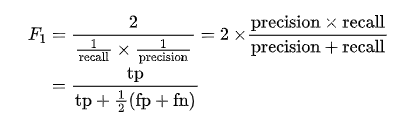

* **Gain d’information**
    * Le gain d'information est utilisé pour décider de l'ordre des attributs dans les nœuds d'un arbre de décision. Il mesure la quantité d'informations qu'une fonctionnalité nous donne sur la classe. Il nous indique à quel point un attribut donné des vecteurs de caractéristiques est important.

    * Le gain d'information (IG) est calculé comme suit:

    * Gain d'information = entropie (parent) - [entropie moyenne (enfants)]


# C’est quoi un SVM ? 

les SVM sont un ensemble de techniques d’apprentissage supervisé qui ont pour objectif de trouver, dans un espace de dimension N>1, l’hyperplan qui divise au mieux un jeu de donnée en deux. Les SVM reposent sur l’idée de trouver un hyperplan qui divise au mieux un jeu de données en deux classes. Le SVM peut etre utilisé pour les problèmes de classification de texte telles que l’attribution de catégorie, la détection du spam ou encore l’analyse des sentiments. Ils sont également couramment utilisés pour les problèmes de reconnaissance d’image, particulièrement en reconnaissance de forme et en classification de couleur. SVM joue également un rôle essentiel dans de nombreux domaines de la reconnaissance manuscrite des symboles, tels que les services d’automatisation postale.

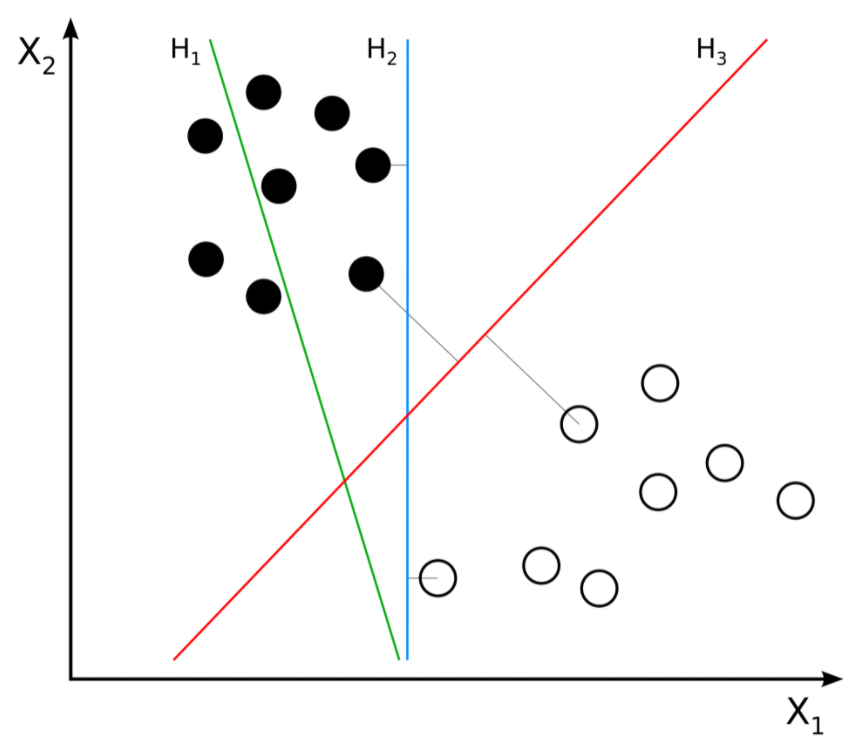

In [ ]:
svm = SVC(probability=True)
# Fit to the training data
svm.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = svm.predict(X_test)

print("Score Support Vector Machines on train data : {}".format(svm.score(X_train, y_train)))